In [1]:
#RESEARCH MIAAAW

In [47]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Cargar los datos
sample_data = pd.read_csv('/content/Sample Data Table.csv')
orthopyroxene_data = pd.read_csv('/content/Electron Microprobe Orthopyroxene Analyses.csv')

In [48]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar los datos
sample_data = pd.read_csv('/content/Sample Data Table.csv')
orthopyroxene_data = pd.read_csv('/content/Electron Microprobe Orthopyroxene Analyses.csv')

# Verificar las primeras filas de los datos
print("Datos de Sample Data Table:")
print(sample_data.head())
print("Datos de Electron Microprobe Orthopyroxene Analyses:")
print(orthopyroxene_data.head())

Datos de Sample Data Table:
    Sample  Stratigraphic Unit  Latitude (WGS84)  Longitude (WGS84)
0  MI16-09           Autopista           -16.288           -71.5118
1  MI16-46  Ponche Iridiscente           -16.281           -71.4945
2  MI16-47         Ponche Gris           -16.281           -71.4945
3  MI16-51             Sancayo           -16.281           -71.4945
4  MI16-52           La Rosada           -16.281           -71.4945
Datos de Electron Microprobe Orthopyroxene Analyses:
        Unit     Sample Sub-sample  Crystal  Spot number  Na2O    MgO   SiO2  \
0  Autopista  MI-19-MT1        NaN        2            1  0.01  26.65  53.48   
1  Autopista  MI-19-MT1        NaN        2            2  0.03  26.49  51.92   
2  Autopista  MI-19-MT1        NaN        3            1  0.01  27.43  53.34   
3  Autopista  MI-19-MT1        NaN        3            2  0.03  26.82  53.61   
4  Autopista  MI-19-MT1        NaN        3            3  0.02  27.42  53.31   

   Al2O3   K2O  ...   Mg   Si 

In [51]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Cargar los datasets
sample_data = pd.read_csv('/content/Sample Data Table.csv')
orthopyroxene_data = pd.read_csv('/content/Electron Microprobe Orthopyroxene Analyses.csv')

# Unir los datasets usando la columna 'Sample'
merged_data = pd.merge(orthopyroxene_data, sample_data, on='Sample')

# Seleccionar solo las columnas numéricas para la imputación y estandarización
X_numeric = merged_data.select_dtypes(include=['float64', 'int64'])

# Imputar valores faltantes usando la media en las columnas numéricas
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Mostrar las primeras filas de los datos estandarizados
print("Datos estandarizados listos para PCA:")
print(pd.DataFrame(X_scaled, columns=X_numeric.columns).head())


Datos estandarizados listos para PCA:
    Crystal  Spot number      Na2O       MgO      SiO2     Al2O3       K2O  \
0 -1.032383    -0.932103 -1.008453 -1.028127  0.023318 -2.232883  0.681218   
1 -1.032383    -0.514814  0.076037 -1.179082 -1.978336 -0.010176  0.681218   
2 -0.594891    -0.932103 -1.008453 -0.292221 -0.156318 -1.761400 -0.677369   
3 -0.594891    -0.514814  0.076037 -0.867737  0.190122 -1.806303  0.681218   
4 -0.594891    -0.097525 -0.466208 -0.301656 -0.194811 -1.716497  0.681218   

        CaO      TiO2     Cr2O3  ...        Al        K         Ca        Ti  \
0 -0.476103 -1.459757 -0.299635  ... -1.759012  1.911301  3.250896 -1.384673   
1 -0.426672 -0.982853 -0.299635  ... -1.593541  3.159783  4.260633 -1.365511   
2 -0.212473 -1.777692 -0.299635  ... -0.104299  0.000000  4.182961 -1.365511   
3 -0.476103 -1.141821  0.242087  ... -1.262598  4.736813  4.804337 -1.384673   
4 -0.228950 -1.141821 -0.028774  ... -0.600713  4.276846  4.260633 -1.403835   

            

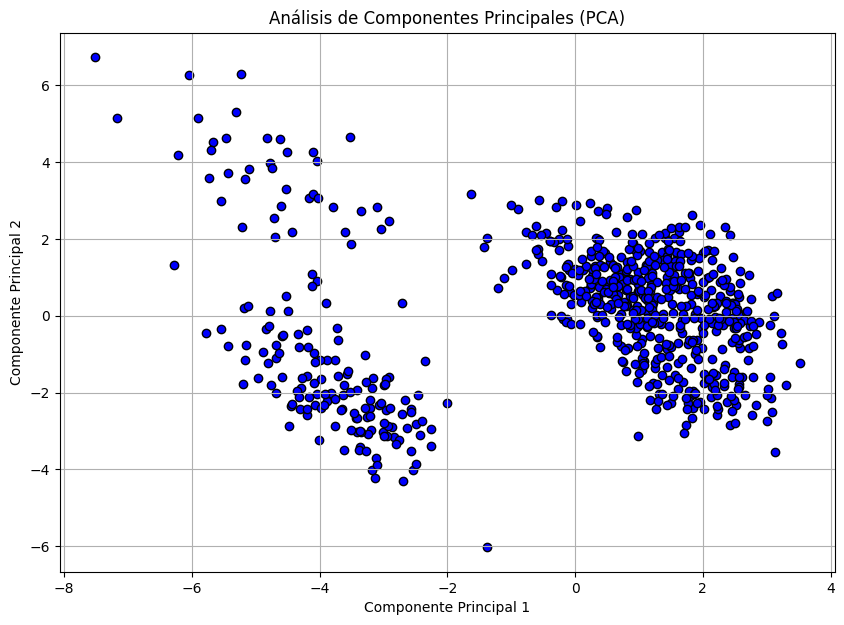

Varianza explicada por el primer componente: 0.22277522914865236
Varianza explicada por el segundo componente: 0.11998355253324398


In [52]:
# Importar la biblioteca necesaria para PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA a los datos estandarizados
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Visualizar los dos primeros componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', edgecolor='k')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Imprimir cuánta varianza explican los componentes principales
print(f"Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]}")
print(f"Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]}")


Contribución de las variables al Componente Principal 1:
Ti                   0.365021
Fe                   0.343270
TiO2                 0.245052
MgO                  0.220305
Total                0.164015
Longitude (WGS84)    0.160371
Al2O3                0.159822
Spot number          0.155022
SiO2                 0.134440
Mn                   0.096474
Cr2O3                0.061853
CaO                  0.053070
NiO                  0.015427
Ni                   0.011921
Mg                   0.009895
Na2O                 0.009674
Crystal             -0.016107
K2O                 -0.019139
Cr                  -0.129579
Latitude (WGS84)    -0.130620
Al                  -0.186665
Ca                  -0.213946
FeO                 -0.228358
MnO                 -0.229780
K                   -0.289867
Si                  -0.290839
Na                  -0.338969
Name: PC1, dtype: float64

Contribución de las variables al Componente Principal 2:
MnO                  0.362998
FeO                

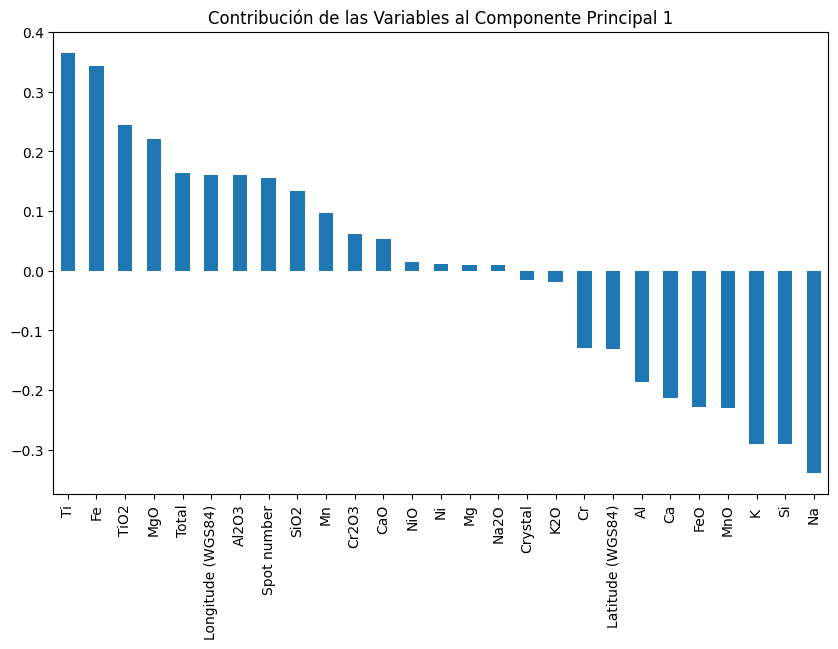

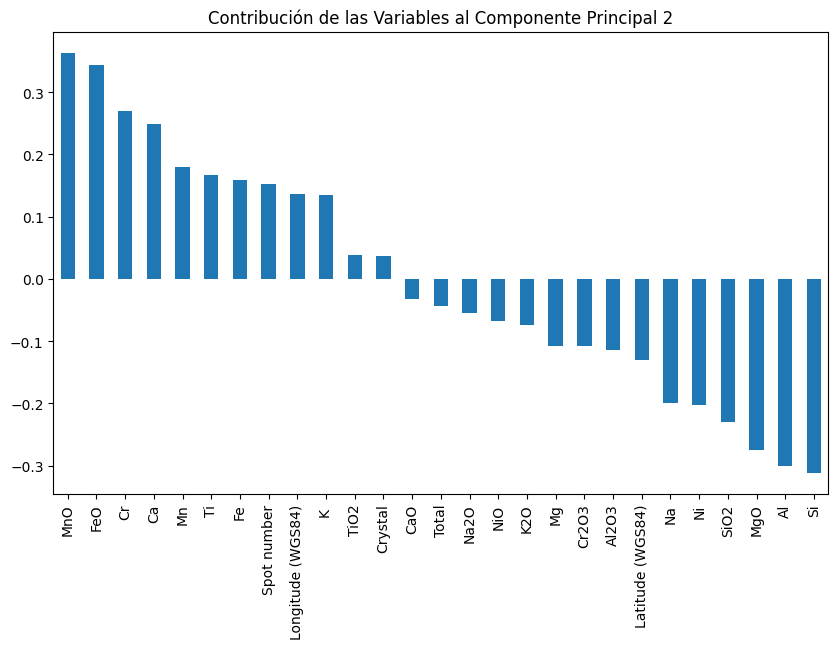

In [53]:
# Obtener los componentes principales y sus pesos en cada variable
components = pd.DataFrame(pca.components_, columns=X_numeric.columns, index=['PC1', 'PC2'])

# Mostrar las contribuciones de las variables a los dos primeros componentes
print("Contribución de las variables al Componente Principal 1:")
print(components.loc['PC1'].sort_values(ascending=False))

print("\nContribución de las variables al Componente Principal 2:")
print(components.loc['PC2'].sort_values(ascending=False))

# Visualizar las contribuciones de las variables al primer componente
plt.figure(figsize=(10, 6))
components.loc['PC1'].sort_values(ascending=False).plot(kind='bar')
plt.title('Contribución de las Variables al Componente Principal 1')
plt.show()

# Visualizar las contribuciones de las variables al segundo componente
plt.figure(figsize=(10, 6))
components.loc['PC2'].sort_values(ascending=False).plot(kind='bar')
plt.title('Contribución de las Variables al Componente Principal 2')
plt.show()


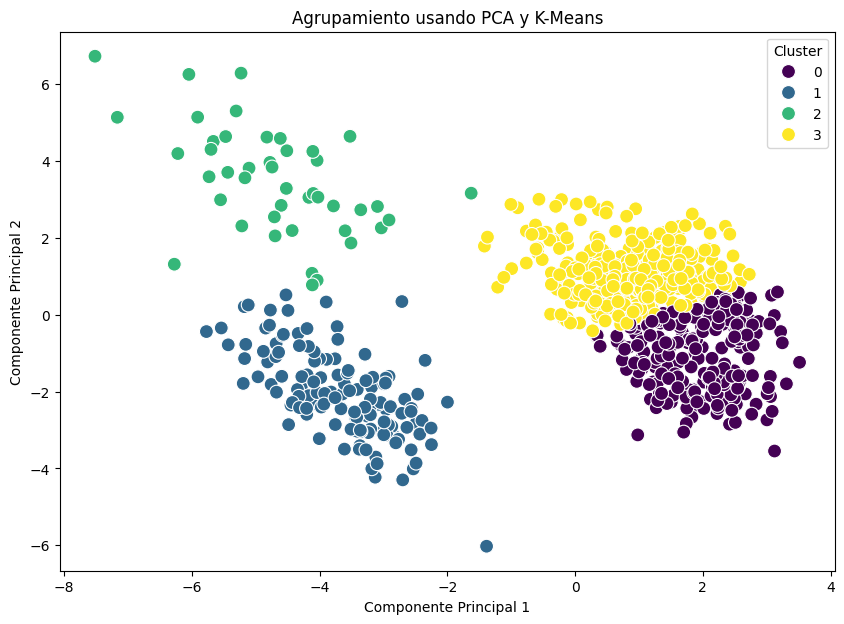

In [54]:
# Importar KMeans
from sklearn.cluster import KMeans
import seaborn as sns

# Aplicar K-Means para agrupar las muestras (puedes ajustar n_clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Añadir las etiquetas de cluster al DataFrame original
merged_data['Cluster'] = kmeans.labels_

# Visualización de los clusters en los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=merged_data['Cluster'], palette='viridis', s=100)
plt.title('Agrupamiento usando PCA y K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Composición geoquímica promedio de cada cluster:
          Crystal  Spot number      Na2O        MgO       SiO2     Al2O3  \
Cluster                                                                    
0        4.171171     3.144144  0.030901  28.682432  54.018468  1.675180   
1        4.522727     1.590909  0.029167  27.348030  53.323333  1.302727   
2        4.522727     2.181818  0.026136  26.349773  52.767955  1.127500   
3        4.402597     4.152597  0.027045  27.426688  53.219091  1.407273   

              K2O       CaO      TiO2     Cr2O3  ...          Al          K   \
Cluster                                          ...                           
0        0.005856  1.392207  0.288468  0.021261  ...  189.878378  257.594595   
1        0.006061  1.202197  0.204848  0.006212  ...  198.765152  284.058824   
2        0.004773  1.080909  0.188409  0.008182  ...  187.000000  317.035714   
3        0.003929  1.235584  0.277532  0.006201  ...  188.204545  264.340909   

             

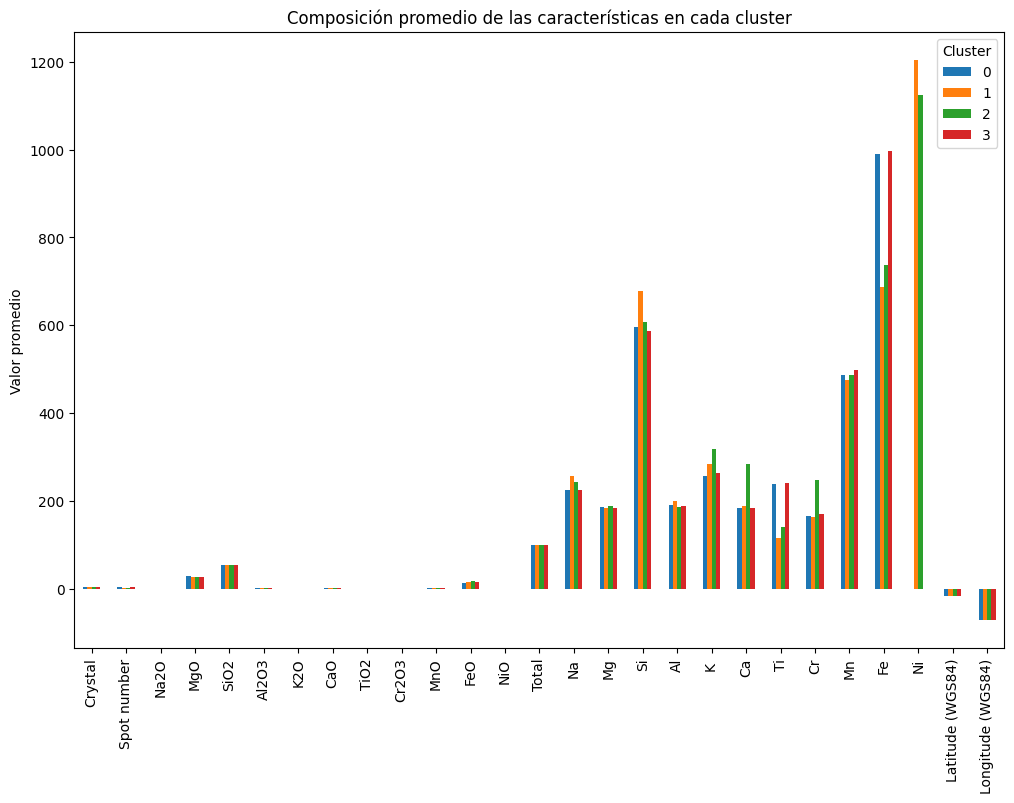

In [57]:
# Seleccionar solo las columnas numéricas
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Agrupar los datos por cluster y calcular las medias de las características numéricas
cluster_means = merged_data.groupby('Cluster')[numerical_columns].mean()

# Mostrar la composición geoquímica promedio de cada cluster
print("Composición geoquímica promedio de cada cluster:")
print(cluster_means)

# Visualización de la composición de cada cluster
cluster_means.T.plot(kind='bar', figsize=(12, 8), title='Composición promedio de las características en cada cluster')
plt.ylabel('Valor promedio')
plt.show()



Distribución de los clusters en las unidades estratigráficas:
Stratigraphic Unit  Apo  Autopista  La Rosada  Misquirichi  Ponche Gris  \
Cluster                                                                   
0                    22          0         10            2           52   
1                    12         14         36           20           21   
2                     0         41          0            1            0   
3                    44          0         73           36            0   

Stratigraphic Unit  Ponche Iridiscente  Sancayo  Sandwich Inferior  \
Cluster                                                              
0                                   43       16                 16   
1                                    0       16                 13   
2                                    0        2                  0   
3                                    0       61                 73   

Stratigraphic Unit  Sandwich Superior  
Cluster                   

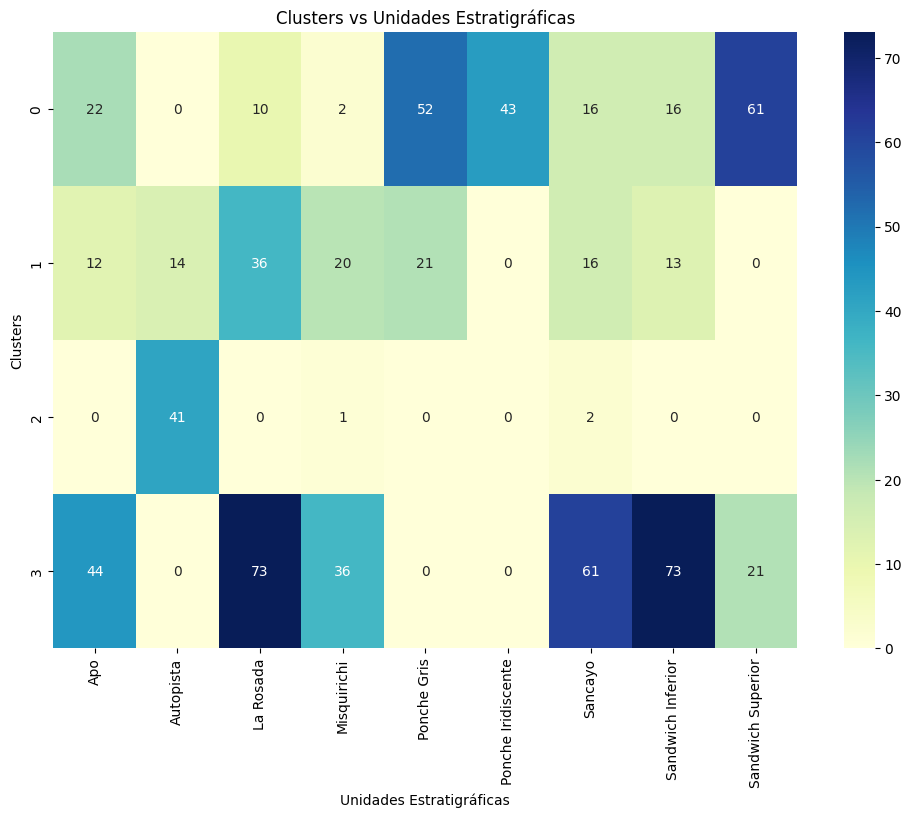

In [58]:
# Crear una tabla de contingencia para observar la distribución de los clusters en las unidades estratigráficas
cross_tab = pd.crosstab(merged_data['Cluster'], merged_data['Stratigraphic Unit'])

# Mostrar la tabla de contingencia
print("Distribución de los clusters en las unidades estratigráficas:")
print(cross_tab)

# Visualizar la distribución con un heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Clusters vs Unidades Estratigráficas')
plt.ylabel('Clusters')
plt.xlabel('Unidades Estratigráficas')
plt.show()
